<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Check missing values in critical columns
missing_counts = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values:\n", missing_counts)

# Drop rows where 'Employment' is missing (critical for analysis)
df = df.dropna(subset=['Employment'])

# For 'JobSat' and 'RemoteWork', fill missing values with 'Unknown'
df['JobSat'] = df['JobSat'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Verify changes
print("Missing values after handling:\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
## Write your code here

In [5]:
# Convert YearsCodePro to numeric, coerce errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

# Create experience range column
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [6]:
# Map JobSat categories to numeric scores
jobsat_map = {
    'Very satisfied': 5,
    'Satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Dissatisfied': 2,
    'Very dissatisfied': 1,
    'Unknown': None  # or np.nan if you want to ignore 'Unknown'
}

df['JobSatScore'] = df['JobSat'].map(jobsat_map)

# Calculate the median JobSatScore for each experience range
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSatScore'].median()
print(median_jobsat_by_experience)

ExperienceRange
0-5     NaN
5-10    NaN
10-20   NaN
>20     NaN
Name: JobSatScore, dtype: float64


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_24512\3358738188.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSatScore'].median()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


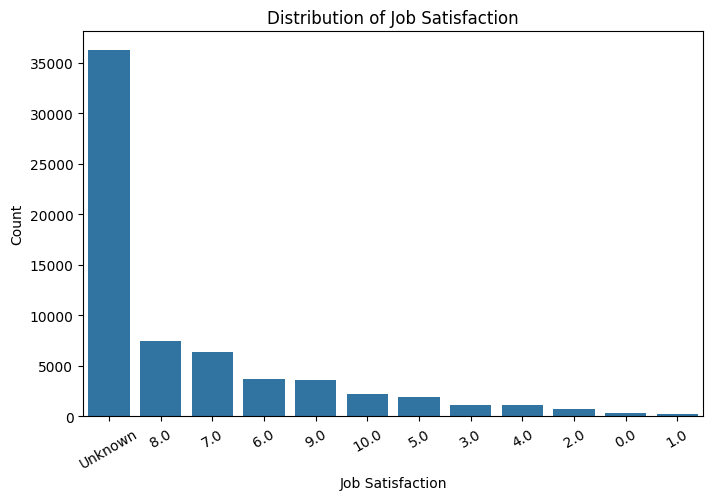

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


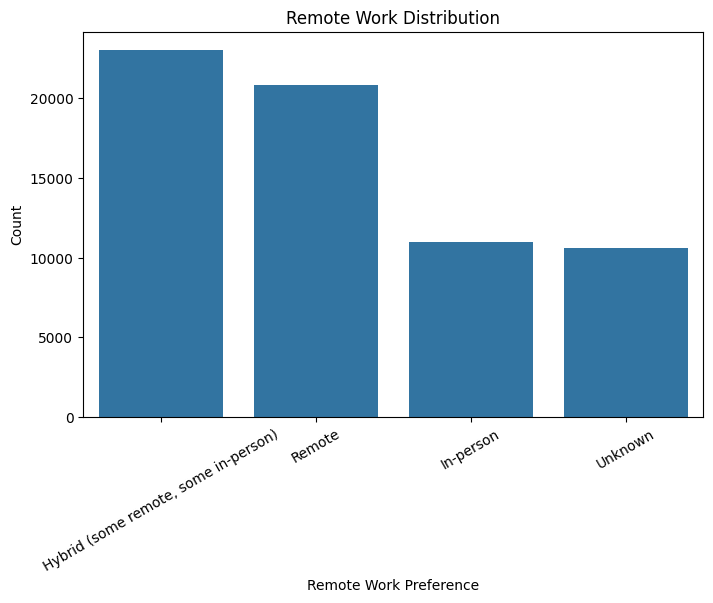

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          0   
Student, part-time                                                              

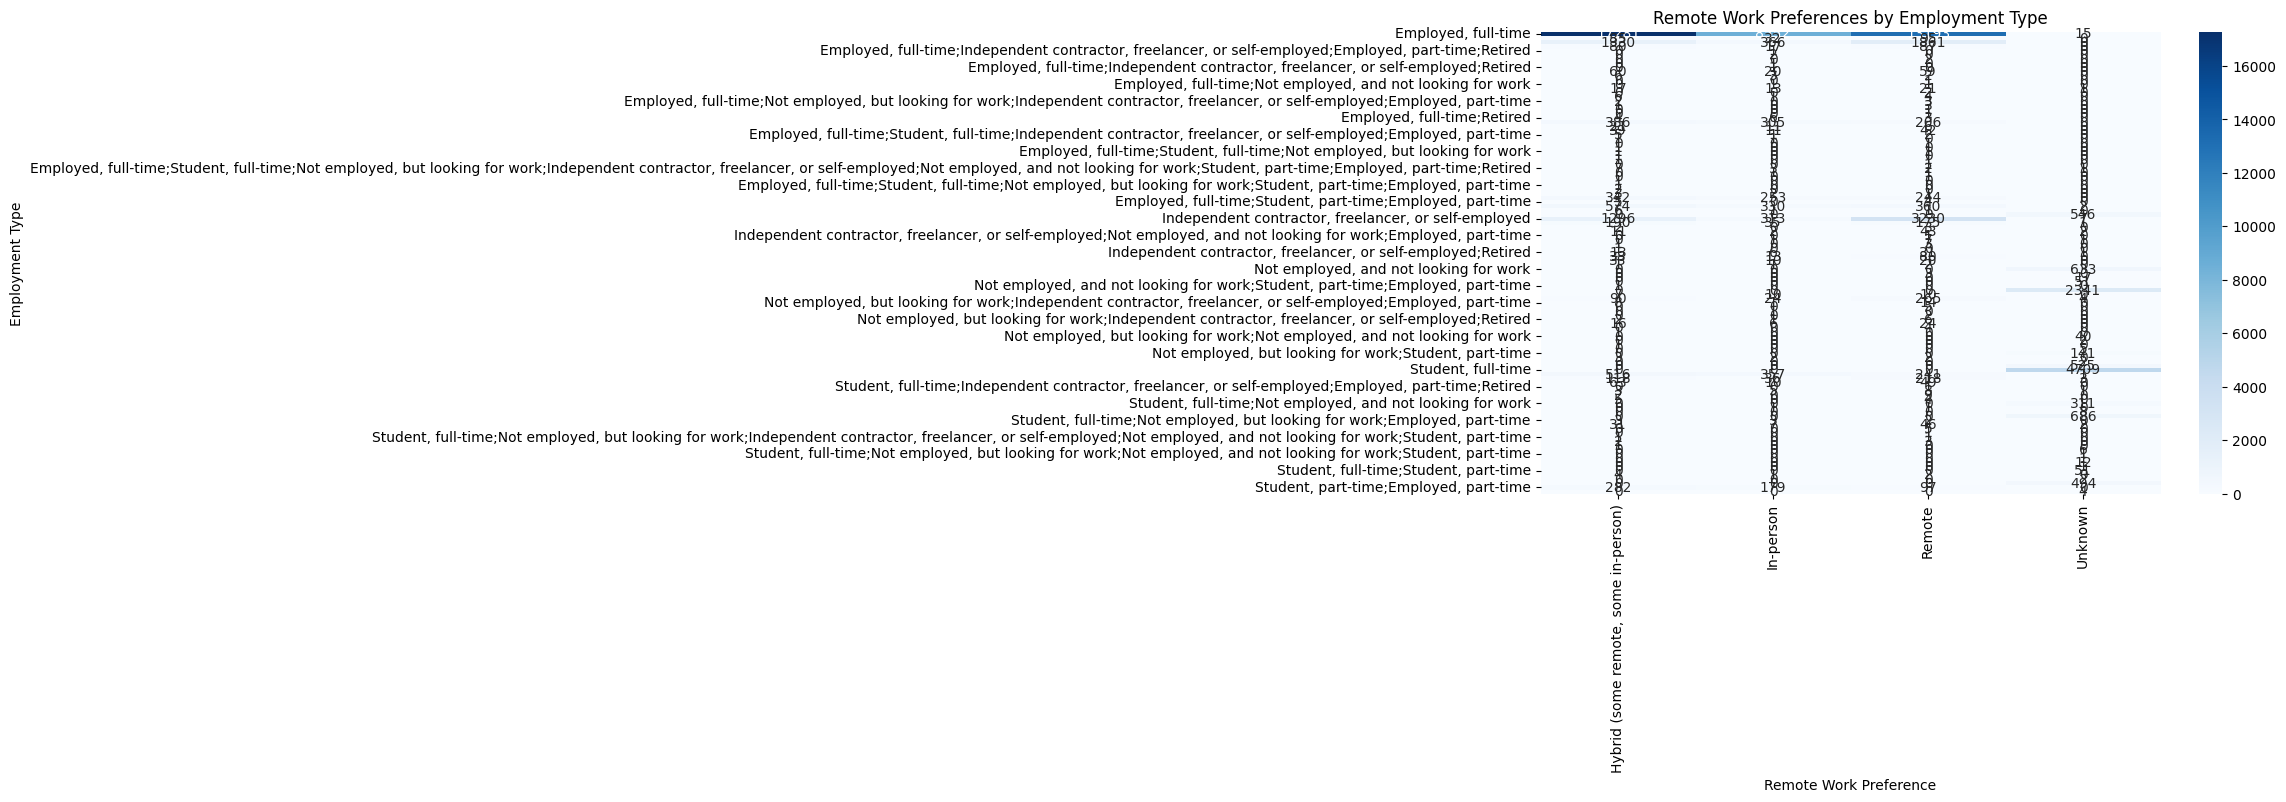

In [9]:
# Cross-tabulate RemoteWork preferences by Employment type
remotework_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remotework_employment_ct)

# Optionally, visualize the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(remotework_employment_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Preference')
plt.ylabel('Employment Type')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_24512\1922934713.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_popularity_all.head(top_n), x='Count', y='Language', palette='viridis')


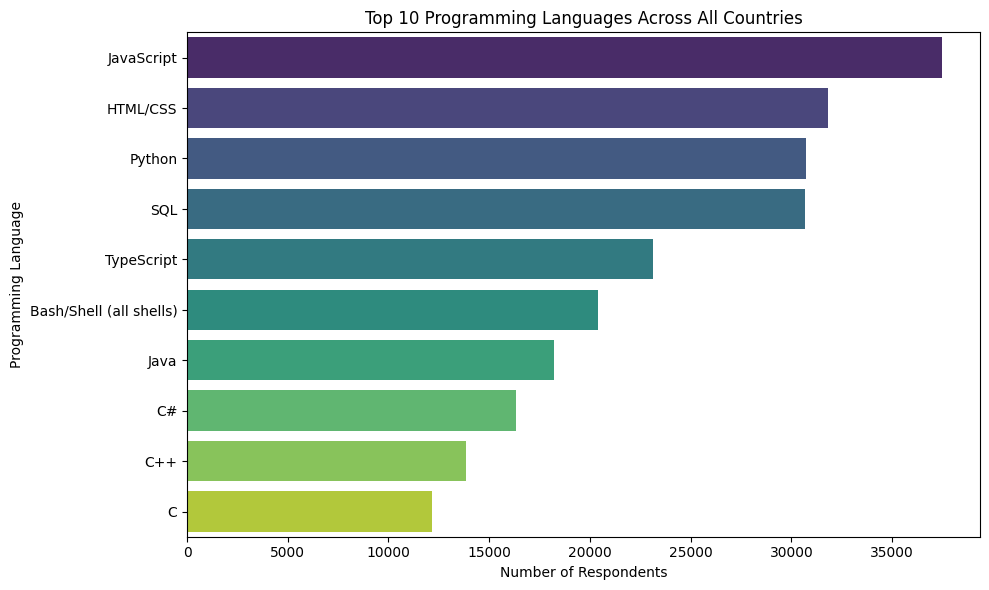

In [11]:
from collections import Counter

# Analyze top programming languages for all countries
languages_series_all = df['LanguageHaveWorkedWith'].dropna().str.split(';')
language_counts_all = Counter([lang for sublist in languages_series_all for lang in sublist])

language_popularity_all = pd.DataFrame(language_counts_all.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)
top_n = 10  # Show top 10 languages

if not language_popularity_all.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=language_popularity_all.head(top_n), x='Count', y='Language', palette='viridis')
    plt.title(f'Top {top_n} Programming Languages Across All Countries')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Programming Language')
    plt.tight_layout()
    plt.show()
else:
    print("No language data available for all countries.")


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


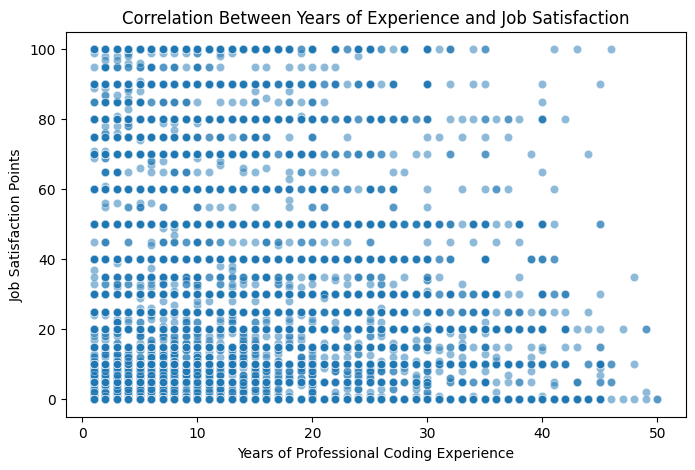

In [12]:
# Convert YearsCodePro to numeric if not already done
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Convert JobSatPoints_1 to numeric (if not already)
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column for plotting
scatter_df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=scatter_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


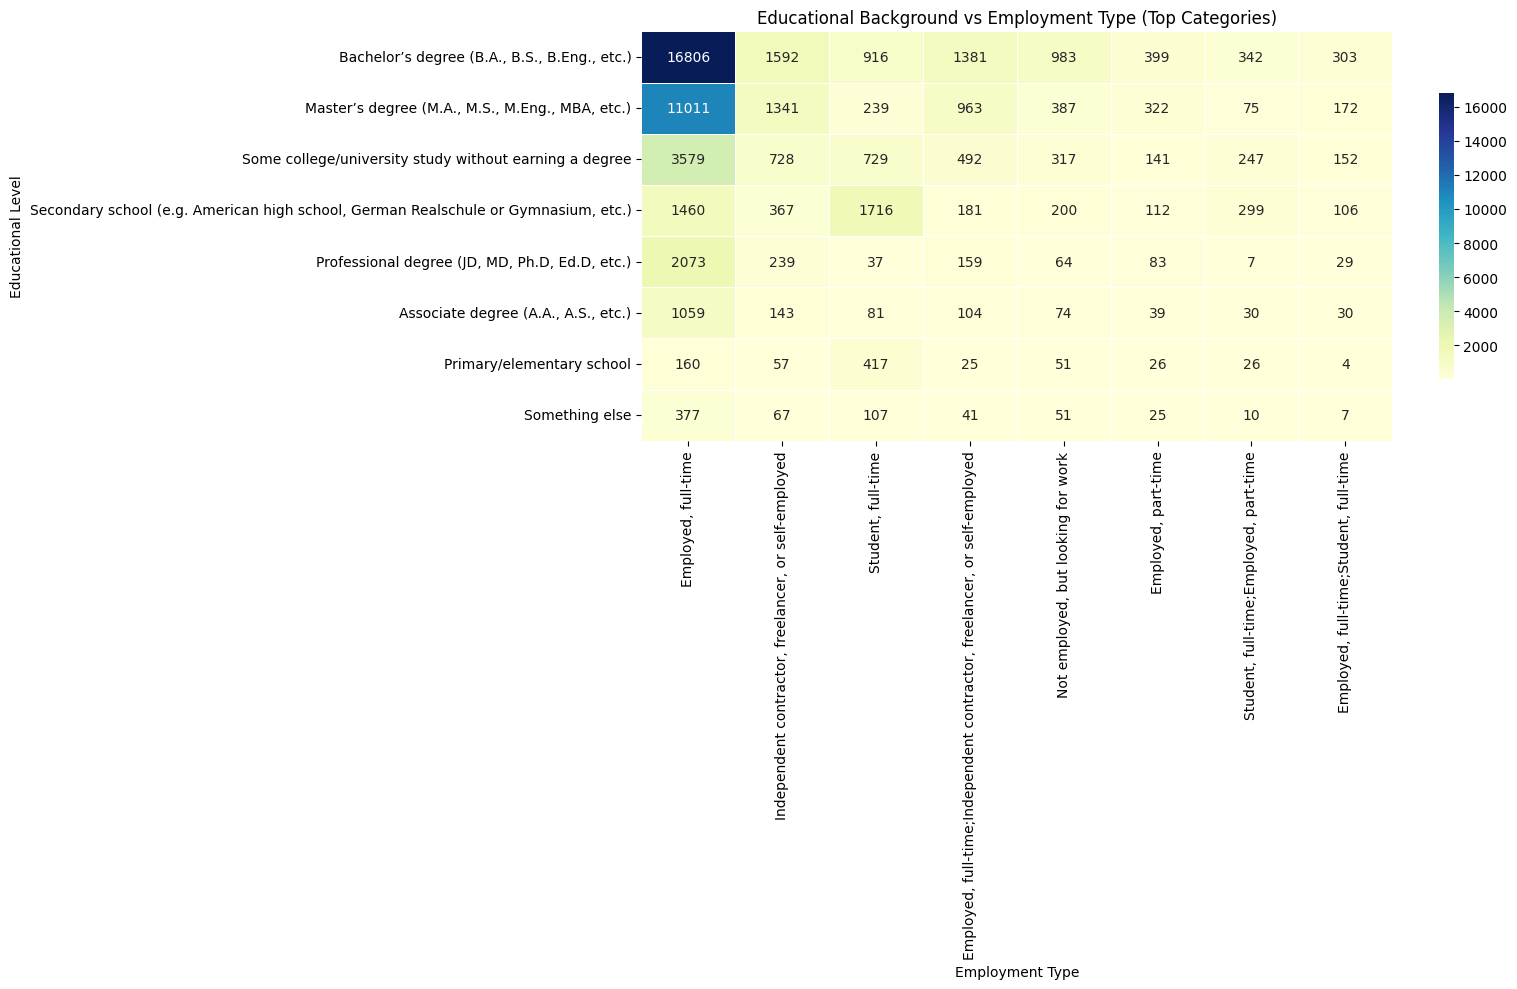

In [13]:
# Show top 8 education levels and top 8 employment types for clarity
top_edlevels = df['EdLevel'].value_counts().index[:8]
top_employment = df['Employment'].value_counts().index[:8]

filtered_ct = pd.crosstab(
    df['EdLevel'], df['Employment']
).loc[top_edlevels, top_employment]

plt.figure(figsize=(16, 10))
sns.heatmap(filtered_ct, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.7})
plt.title('Educational Background vs Employment Type (Top Categories)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
# Save the cleaned and analyzed dataset to a CSV file
df.to_csv('survey-data-cleaned.csv', index=False)
print("Dataset saved as 'survey-data-cleaned.csv'")

Dataset saved as 'survey-data-cleaned.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
